In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
from pprint import pprint as pp
import csv
from pathlib import Path
import seaborn as sns
from itertools import product
import string

import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

from imblearn.over_sampling import SMOTE, SMOTEN
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.pipeline import Pipeline 

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.metrics import homogeneity_score, silhouette_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import MiniBatchKMeans, DBSCAN

#import gensim
#from gensim import corpora

## Checking the fraud to non-fraud ratio

In [2]:
# Import pandas and read csv
import pandas as pd
df = pd.read_csv("chapter_1/creditcard_sampledata_3.csv")

# Explore the features available in your dataframe
print(df.info())

# Count the occurrences of fraud and no fraud and print them
occ = df['Class'].value_counts()
print(occ)

# Print the ratio of fraud cases
print(occ / len(df['Class']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5050 non-null   int64  
 1   V1          5050 non-null   float64
 2   V2          5050 non-null   float64
 3   V3          5050 non-null   float64
 4   V4          5050 non-null   float64
 5   V5          5050 non-null   float64
 6   V6          5050 non-null   float64
 7   V7          5050 non-null   float64
 8   V8          5050 non-null   float64
 9   V9          5050 non-null   float64
 10  V10         5050 non-null   float64
 11  V11         5050 non-null   float64
 12  V12         5050 non-null   float64
 13  V13         5050 non-null   float64
 14  V14         5050 non-null   float64
 15  V15         5050 non-null   float64
 16  V16         5050 non-null   float64
 17  V17         5050 non-null   float64
 18  V18         5050 non-null   float64
 19  V19         5050 non-null  

In [3]:
df.describe()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,...,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000,5050.000000
mean,142870.017030,-0.014675,0.044325,-0.035144,0.002494,-0.046625,-0.046340,-0.043020,-0.008398,-0.027331,...,-0.003516,-0.009421,-0.004147,-0.001200,-0.003314,-0.004836,-0.005726,0.002482,86.117232,0.009901
std,82574.683531,1.952784,1.558235,1.691458,1.493592,1.321320,1.254301,1.338170,1.323247,1.134506,...,0.756735,0.724749,0.601276,0.599400,0.517363,0.481913,0.411055,0.302719,227.210259,0.099020
min,5.000000,-25.266355,-18.701995,-26.823673,-4.575708,-18.664251,-6.357009,-23.783470,-41.484823,-8.504285,...,-20.262054,-5.532541,-17.026156,-2.307453,-3.308049,-1.715640,-7.976100,-5.048979,0.000000,0.000000
25%,71817.750000,-0.926226,-0.589562,-0.873696,-0.871759,-0.733235,-0.777552,-0.571678,-0.211263,-0.651215,...,-0.231508,-0.558904,-0.161166,-0.354973,-0.316947,-0.331584,-0.070963,-0.052133,4.990000,0.000000
50%,142544.000000,0.009592,0.088726,0.168377,-0.027034,-0.060932,-0.304225,0.036753,0.000985,-0.052724,...,-0.035204,-0.013332,-0.011305,0.038272,0.019200,-0.059882,0.003521,0.012842,20.260000,0.000000
75%,215019.000000,1.310062,0.809298,1.017166,0.763626,0.603678,0.356664,0.594029,0.313264,0.568374,...,0.196481,0.509243,0.146835,0.441278,0.348177,0.228486,0.095662,0.077357,75.000000,0.000000
max,284782.000000,2.422508,14.323254,3.760965,11.885313,9.880564,7.473970,9.288494,16.633103,8.054123,...,19.283602,5.805795,13.218751,3.535179,3.590787,2.961609,4.623508,9.876371,4584.880000,1.000000


## Plotting your data

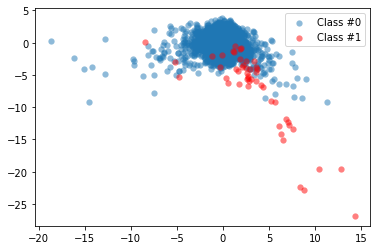

In [4]:
plt.scatter(df.V2[df.Class == 0], df.V3[df.Class == 0], label="Class #0", alpha=0.5, linewidth=0.15)
plt.scatter(df.V2[df.Class == 1], df.V3[df.Class == 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
plt.legend()
plt.show()

### Applying SMOTE

In [5]:
def prep_data(df: pd.DataFrame) -> (np.ndarray, np.ndarray):
    """
    Convert the DataFrame into two variable
    X: data columns (V1 - V28)
    y: lable column
    """
    X = df.iloc[:, 2:30].values
    y = df.Class.values
    return X, y

In [6]:
# Define a function to create a scatter plot of our data and labels
def plot_data(X: np.ndarray, y: np.ndarray):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

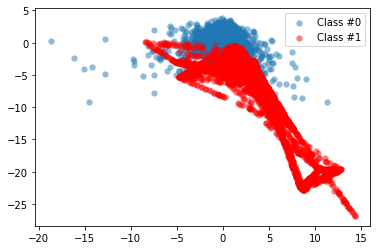

In [7]:
from imblearn.over_sampling import SMOTE

# Run the prep_data function
X, y = prep_data(df)

# Define the resampling method
method = SMOTE()

# Create the resampled feature set
X_resampled, y_resampled = method.fit_resample(X, y)

# Plot the resampled data
plot_data(X_resampled, y_resampled)

### Compare SMOTE to original data

In [8]:
def compare_plot(X: np.ndarray, y: np.ndarray, X_resampled: np.ndarray, y_resampled: np.ndarray, method: str):
    plt.subplot(1, 2, 1)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.title('Original Set')
    plt.subplot(1, 2, 2)
    plt.scatter(X_resampled[y_resampled == 0, 0], X_resampled[y_resampled == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X_resampled[y_resampled == 1, 0], X_resampled[y_resampled == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.title(method)
    plt.legend()
    plt.show()

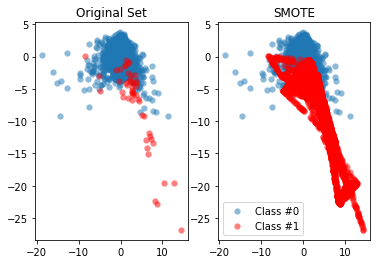

In [9]:
compare_plot(X, y, X_resampled, y_resampled, method='SMOTE')

### Exploring the traditional way to catch fraud

In [10]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [11]:
df.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,0.035030,0.011553,0.037444,-0.045760,-0.013825,-0.030885,0.014315,-0.022432,-0.002227,0.001667,...,-0.002896,-0.010583,-0.010206,-0.003305,-0.000918,-0.002613,-0.004651,-0.009584,0.002414,85.843714
1,-4.985211,3.321539,-7.293909,4.827952,-3.326587,-1.591882,-5.776541,1.395058,-2.537728,-5.917934,...,0.194580,0.703182,0.069065,-0.088374,-0.029425,-0.073336,-0.023377,0.380072,0.009304,113.469000


In [12]:
df['flag_as_fraud'] = np.where(np.logical_and(df.V1 < -3, df.V3 < -5), 1, 0)

In [13]:
# Create a crosstab of flagged fraud cases versus the actual fraud cases
print(pd.crosstab(df.Class, df.flag_as_fraud, rownames=['Actual Fraud'], colnames=['Flagged Fraud']))

Flagged Fraud     0   1
Actual Fraud           
0              4984  16
1                28  22


### Using ML classification to catch fraud

In [14]:
# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

# Fit a logistic regression model to our data
model = LogisticRegression(solver='liblinear', random_state = 42)
model.fit(X_train, y_train)

# Obtain model predictions
predicted = model.predict(X_test)

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1505
           1       0.89      0.80      0.84        10

    accuracy                           1.00      1515
   macro avg       0.94      0.90      0.92      1515
weighted avg       1.00      1.00      1.00      1515

Confusion matrix:
 [[1504    1]
 [   2    8]]


In [15]:
X_train.shape

(3535, 28)

In [16]:
predicted = model.predict(X_train)

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_train, predicted))
conf_mat = confusion_matrix(y_true=y_train, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3495
           1       0.97      0.90      0.94        40

    accuracy                           1.00      3535
   macro avg       0.99      0.95      0.97      3535
weighted avg       1.00      1.00      1.00      3535

Confusion matrix:
 [[3494    1]
 [   4   36]]


### Logistic regression combined with SMOTE

In [17]:
# This is the pipeline module we need for this from imblearn
from imblearn.pipeline import Pipeline 

# Define which resampling method and which ML model to use in the pipeline
resampling = BorderlineSMOTE(random_state = 42)
model = LogisticRegression(solver='liblinear', random_state = 42)

# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
pipeline = Pipeline([('SMOTE', resampling), 
                     ('Logistic Regression', model)])

In [18]:
# Split your data X and y, into a training and a test set and fit the pipeline onto the training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit your pipeline onto your training set and obtain predictions by fitting the model onto the test data 
pipeline.fit(X_train, y_train) 
predicted = pipeline.predict(X_test)

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1503
           1       0.80      1.00      0.89        12

    accuracy                           1.00      1515
   macro avg       0.90      1.00      0.94      1515
weighted avg       1.00      1.00      1.00      1515

Confusion matrix:
 [[1500    3]
 [   0   12]]


In [19]:
predicted = pipeline.predict(X_train)

# Obtain the results from the classification report and confusion matrix 
print('Classifcation report:\n', classification_report(y_train, predicted))
conf_mat = confusion_matrix(y_true=y_train, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3497
           1       0.75      0.95      0.84        38

    accuracy                           1.00      3535
   macro avg       0.87      0.97      0.92      3535
weighted avg       1.00      1.00      1.00      3535

Confusion matrix:
 [[3485   12]
 [   2   36]]


In [20]:
X_res, y_res = resampling.fit_resample(X_train,y_train)

In [21]:
X_res.shape

(6994, 28)

In [22]:
y_res.shape

(6994,)

In [23]:
X_train.shape

(3535, 28)

In [24]:
model.fit(X_res, y_res)

LogisticRegression(random_state=42, solver='liblinear')

In [25]:
predicted = model.predict(X_res)

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_res, predicted))
conf_mat = confusion_matrix(y_true=y_res, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3497
           1       1.00      1.00      1.00      3497

    accuracy                           1.00      6994
   macro avg       1.00      1.00      1.00      6994
weighted avg       1.00      1.00      1.00      6994

Confusion matrix:
 [[3485   12]
 [   5 3492]]


In [26]:
# Obtain model predictions
predicted = model.predict(X_test)

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1503
           1       0.80      1.00      0.89        12

    accuracy                           1.00      1515
   macro avg       0.90      1.00      0.94      1515
weighted avg       1.00      1.00      1.00      1515

Confusion matrix:
 [[1500    3]
 [   0   12]]


In [27]:
# Obtain model predictions
predicted = model.predict(X_train)

# Print the classifcation report and confusion matrix
print('Classification report:\n', classification_report(y_train, predicted))
conf_mat = confusion_matrix(y_true=y_train, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3497
           1       0.75      0.95      0.84        38

    accuracy                           1.00      3535
   macro avg       0.87      0.97      0.92      3535
weighted avg       1.00      1.00      1.00      3535

Confusion matrix:
 [[3485   12]
 [   2   36]]


## SMOTE & CV

In [37]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold
from sklearn.model_selection import cross_validate

In [38]:
mk_pipe = Pipeline([('smote', BorderlineSMOTE(random_state = 42)), ('model',LogisticRegression(solver='liblinear', random_state = 42))])

In [39]:
# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=42)

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(mk_pipe, X_train, y_train, cv=kf, scoring='f1')

In [40]:
# Print scores
print(cv_scores)
print(np.mean(cv_scores))
print(np.std(cv_scores))

[0.66666667 0.77777778 0.85714286 0.70588235 0.75       0.93333333]
0.7818004979769686
0.09007912177919822


In [41]:
# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(LogisticRegression(solver='liblinear', random_state = 42), X_res, y_res, cv=kf, scoring='f1')

In [42]:
# Print scores
print(cv_scores)
print(np.mean(cv_scores))
print(np.std(cv_scores))

[0.99561018 0.99826087 0.99393939 0.99757869 0.99478261 0.99829352]
0.9964108774041379
0.0017190689137614164


In [43]:
# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(LogisticRegression(solver='liblinear', random_state = 42), X_train, y_train, cv=kf, scoring='f1')

In [44]:
# Print scores
print(cv_scores)
print(np.mean(cv_scores))
print(np.std(cv_scores))

[0.85714286 0.875      0.83333333 0.4        0.90909091 0.93333333]
0.8013167388167388
0.18242332574305922
